In [ ]:
%%capture

!pip install craft-text-detector
!mkdir outputs

In [ ]:
import os
import sys
import shutil
import matplotlib.pyplot as plt
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)

In [ ]:
def ClearPreOutput():
    # Clear pre-output
    shutil.rmtree('/content/outputs')
    os.remove
    !mkdir outputs

# **Visualize Dataset**

## **CRAFT**

In [ ]:
def TextDetection(ImageName):
    # set image path and export folder directory
    image = ImageName # can be filepath, PIL image or numpy array
    output_dir = 'outputs/'
    image = read_image(image)

    # load models
    refine_net = load_refinenet_model(cuda=False)
    craft_net = load_craftnet_model(cuda=False)

    # perform prediction
    prediction_result = get_prediction(
        image=image,
        craft_net=craft_net,
        refine_net=refine_net,
        text_threshold=0.7,
        link_threshold=0.4,
        low_text=0.4,
        cuda=False,
        long_size=1280
    )

    # export detected text regions
    exported_file_paths = export_detected_regions(
        image=image,
        regions=prediction_result["boxes"],
        output_dir=output_dir,
        rectify=True
    )
    
    # export heatmap, detection points, box visualization
    #export_extra_results(
    #    image=image,
    #    regions=prediction_result["boxes"],
    #    heatmaps=prediction_result["heatmaps"],
    #    output_dir=output_dir
    #)


    # unload models from gpu
    empty_cuda_cache()

## **Visualize data**

In [ ]:
! gdown https://drive.google.com/uc?id=15jBhGtJsNF5IWJyMwRz39yQC4Z8uWEVw
! unzip -qq -o ./Image.zip

Downloading...
From: https://drive.google.com/uc?id=1EfVsV7BADGNqu621CnCNfH4ixLKm66BZ
To: /content/DT3.zip
100% 182M/182M [00:05<00:00, 36.3MB/s]


In [33]:
ls = os.listdir('/content/Image')
print("Số lượng ảnh trong tập raw-dataset:", ls.index(ls[-1]))

Số lượng ảnh trong tập raw-dataset: 1000


In [35]:
%%capture

numCrop = [0 for i in range(0,31)]
path = '/content/outputs/image_crops/'
for files in ls:
    # Clear pre output
    ClearPreOutput()
    # Detect text in image
    TextDetection('/content/Image/' + files)
    # Get number of cropped images from an image
    lsCrop = os.listdir(path)
    count = lsCrop.index(lsCrop[-1])
    if (count==0):
        continue
    if (count>30):
        numCrop[30] += 1
    else:
        numCrop[count-1] += 1

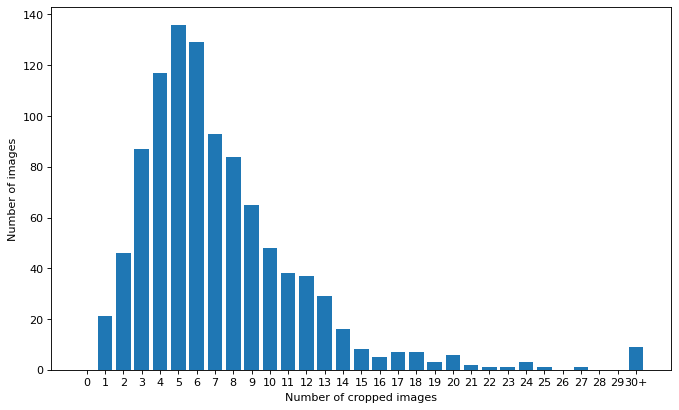

In [47]:
# numCrop = [0, 21, 46, 87, 117, 136, 129, 93, 84, 65, 48, 38, 37, 29, 16, 8, 5, 7, 7, 3, 6, 2, 1, 1, 3, 1, 0, 1, 0, 0, 9]
temp = [str(i) for i in range(0,30)]
temp.append('30+')

plt.figure(figsize=(10, 6), dpi=80)
plt.bar(temp, numCrop)
plt.title('')
plt.xlabel('Number of cropped images')
plt.ylabel('Number of images')
plt.show()

# **Visualize result**

In [41]:
# Transformer OCR
vgg_transformer_full = [80.84, 80.43, 79.75, 79.44, 78.66]
vgg_transformer_per = [95.79, 95.82, 95.94, 95.45, 94.89]

# Attention OCR
vgg_seq2seq_full = [77.71, 79.48, 80.43, 78.94, 80.43]
vgg_seq2seq_per = [94.70, 95.26, 95.65, 94.96, 95.02]

# Iter
iter = [4000, 6000, 8000, 10000, 12000]

## **Transformer OCR**

**Accuracy full sequence**

No handles with labels found to put in legend.


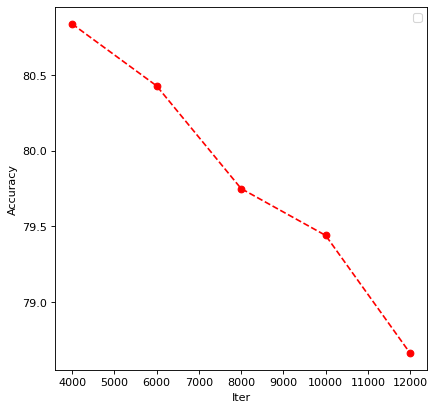

In [42]:
plt.figure(figsize=(6, 6), dpi=80)
plt.plot(iter, vgg_transformer_full, linestyle='--', marker='o', color='r', label='')
plt.xlabel("Iter")
plt.ylabel("Accuracy")
plt.legend()

**Accuracy per character**

No handles with labels found to put in legend.


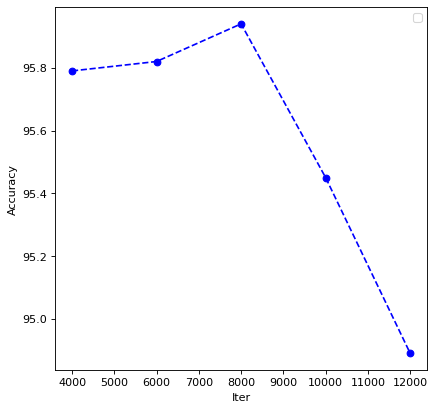

In [43]:
plt.figure(figsize=(6, 6), dpi=80)
plt.plot(iter, vgg_transformer_per, linestyle='--', marker='o', color='b', label='')
plt.xlabel("Iter")
plt.ylabel("Accuracy")
plt.legend()

***Nhận xét:*** Khi sử dụng Transformer OCR, nếu số vòng lặp cho quá trình huấn luyện càng tăng thì *Accuracy full sequence* và *Accuracy per character* càng giảm. Mô hình này đã được train với bộ dữ liệu văn bản tiếng Việt viết tay và được tác giả đánh giá khá cao. Tuy nhiên, với bộ dữ liệu của nhóm em, nó lại không hoạt động tốt và không được phù hợp

## **Attention OCR**

**Accuracy full sequence**

No handles with labels found to put in legend.


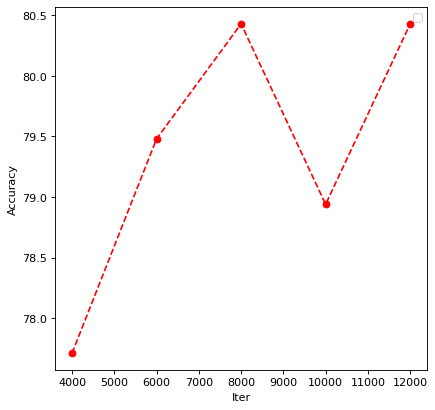

In [44]:
plt.figure(figsize=(6, 6), dpi=80)
plt.plot(iter, vgg_seq2seq_full, linestyle='--', marker='o', color='r', label='')
plt.xlabel("Iter")
plt.ylabel("Accuracy")
plt.legend()

**Accuracy per character**

No handles with labels found to put in legend.


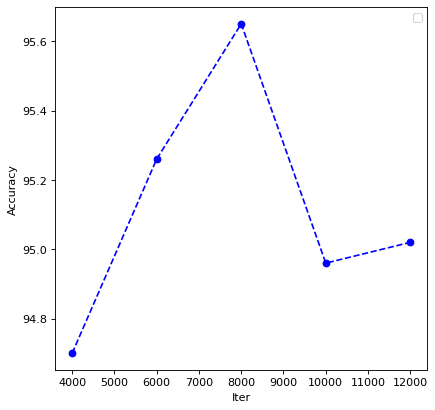

In [45]:
plt.figure(figsize=(6, 6), dpi=80)
plt.plot(iter, vgg_seq2seq_per, linestyle='--', marker='o', color='b', label='')
plt.xlabel("Iter")
plt.ylabel("Accuracy")
plt.legend()

***Nhận xét:*** Ngược lại vơi Transformer OCR, Attention OCR lại cho kết quả tốt hơn. Theo em, có vẻ với kiến trúc Attention kết hợp với mô hình seq2seq (LSTM) thì hoạt động tốt hơn với bộ dataset của nhóm em, cụ thể là với mỗi ảnh crop, văn bản trong ảnh được crop có nhiều nhiễu hơn và ngắn hơn so với bộ dataset tác giả đã huấn luyện

***Kết luận chung:*** Attention OCR có thể hoạt động tốt hơn Transformer OCR với các bộ dataset ít nhiễu, văn bản rõ ràng. Do đó Attention OCR phù hợp với bộ dataset của nhóm em hơn